This notebook is based on the tutorial here: https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8 and contains borrowed and modified codes 

### Resizing Images
When we are formatting images to be inputted to a Keras model, we must specify the input dimensions. Many academic datasets like CIFAR-10 or MNIST are all conveniently the same size, (32x32x3 and 28x28x1 respectively). However, in the spider dataset which consists of crawed images, we have many different sizes of images. First, we will write some code to loop through the images and gather some descriptive statistics on the maximum, mean, and minimum height and width of the spider images.

In [46]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
from random import shuffle
from matplotlib import pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten

IMG_SIZE = 600
label_mapping = {'Redback':0, 'white_tailed':1, 'Garden_Orb_Weaver':2, 'Tarantula':3, 'funnel_web':4}

In [20]:
def get_size_statistics(DIR):
    
    heights = []
    widths = []
    
    for img in os.listdir(DIR): 
        path = os.path.join(DIR, img)
        data = np.array(Image.open(path)) 
        heights.append(data.shape[0])
        widths.append(data.shape[1])
    
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

In [21]:
get_size_statistics("C:/Users/Donghan Yang/Desktop/poisonous-spider-recognition/all")

Average Height: 636.6305732484077
Max Height: 5184
Min Height: 90


Average Width: 812.8407643312102
Max Width: 5184
Min Width: 120


In [22]:
# using one-hot encoding to generate the labels 

# def label_img(name):
#     word_label = name.split(' ')[0]
#     if word_label == 'Redback': 
#         return np.array([1, 0, 0, 0, 0])
#     elif word_label == 'white_tailed': 
#         return np.array([0, 1, 0, 0, 0])
#     elif word_label == 'Garden_Orb_Weaver':
#         return np.array([0, 0, 1, 0, 0])
#     elif word_label == 'Tarantula':
#         return np.array([0, 0, 0, 1, 0])
#     elif word_label == 'funnel_web':
#         return np.array([0, 0, 0, 0, 1])

In [47]:
def label_img(name):
    word_label = name.split(' ')[0]
    return label_mapping[word_label]

In [48]:
def load_training_data(DIR):
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        img = img.convert('RGB')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
        
        # Basic Data Augmentation - Horizontal Flipping
        flip_img = Image.open(path)
        flip_img = flip_img.convert('RGB')
        flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        flip_img = np.array(flip_img)
        flip_img = np.fliplr(flip_img)
        train_data.append([flip_img, label])
    
    shuffle(train_data)
    return train_data

In [49]:
train_data = load_training_data("C:/Users/Donghan Yang/Desktop/poisonous-spider-recognition/train")

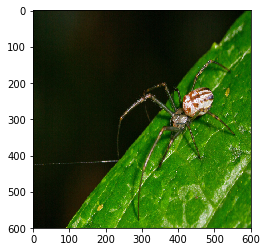

In [50]:
plt.imshow(train_data[30][0])

### CNN Demo

In [39]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
# from sklearn import datasets
# from sklearn.model_selection import train_test_split


# digits = datasets.load_digits()
# X = digits["images"]
# y = digits["target"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# X_train = X_train.reshape(1617,8,8,1)
# X_test = X_test.reshape(180,8,8,1)

# model = Sequential()
# model.add(Conv2D(32,(3,3), activation="relu", input_shape=(8,8,1)))
# model.add(MaxPooling2D(pool_size=(2 , 2)))
# model.add(Flatten())
# model.add(Dense(units=128,activation="relu"))
# model.add(Dense(units=10,activation="softmax"))

# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# model.fit(X_train,y_train,epochs=10)

# results = model.evaluate(X_test,y_test)

In [25]:
# plt.imshow(X[0])

In [51]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
trainLabels = np.array([i[1] for i in train_data])

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

In [53]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [54]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
702/702 [==============================] - 149s 212ms/step - loss: 2.1018 - acc: 0.4060
Epoch 2/10
702/702 [==============================] - 150s 214ms/step - loss: 1.1452 - acc: 0.5997
Epoch 3/10
702/702 [==============================] - 147s 210ms/step - loss: 0.7593 - acc: 0.7222
Epoch 4/10
702/702 [==============================] - 150s 214ms/step - loss: 0.4879 - acc: 0.8276
Epoch 5/10
702/702 [==============================] - 149s 213ms/step - loss: 0.2712 - acc: 0.8960
Epoch 6/10
702/702 [==============================] - 155s 221ms/step - loss: 0.1631 - acc: 0.9430
Epoch 7/10
702/702 [==============================] - 154s 220ms/step - loss: 0.1144 - acc: 0.9630
Epoch 8/10
702/702 [==============================] - 157s 224ms/step - loss: 0.0950 - acc: 0.9729
Epoch 9/10
702/702 [==============================] - 153s 218ms/step - loss: 0.0966 - acc: 0.9729
Epoch 10/10
702/702 [==============================] - 148s 211ms/step - loss: 0.0617 - acc: 0.9786


In [71]:
model.save('sample_cnn.h5')

In [83]:
TEST_DIR = "C:/Users/Donghan Yang/Desktop/poisonous-spider-recognition/dev"

def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        try:
            img = Image.open(path)
            img = img.convert('RGB')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
        except:
            continue
        
        # Basic Data Augmentation - Horizontal Flipping
        flip_img = Image.open(path)
        flip_img = flip_img.convert('RGB')
        flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        flip_img = np.array(flip_img)
        flip_img = np.fliplr(flip_img)
        test_data.append([flip_img, label])
    
    shuffle(test_data)
    return test_data

In [84]:
test_data = load_test_data()

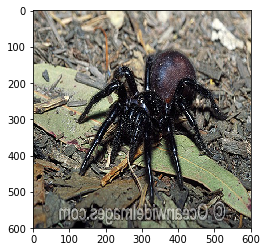

In [86]:
plt.imshow(test_data[30][0])

In [3]:
# testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
# testLabels = np.array([i[1] for i in test_data])

# loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
# print(acc * 100)